In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

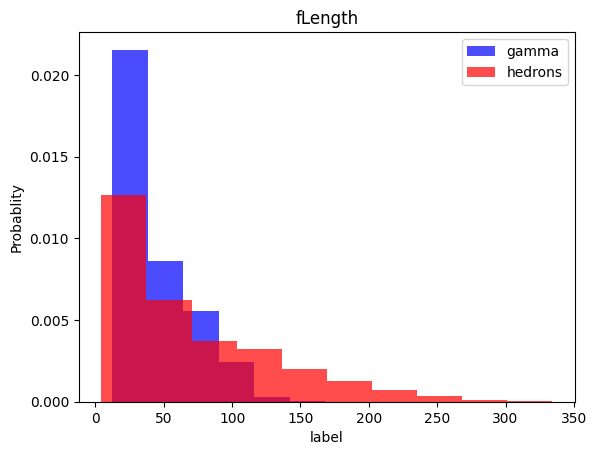

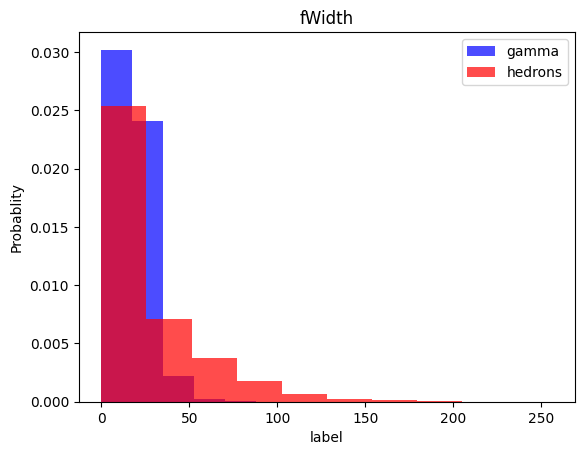

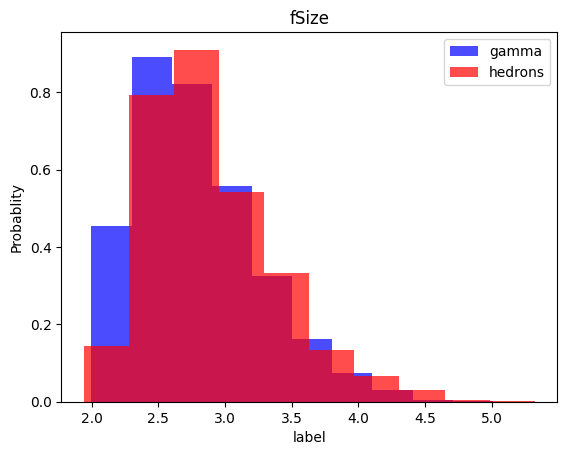

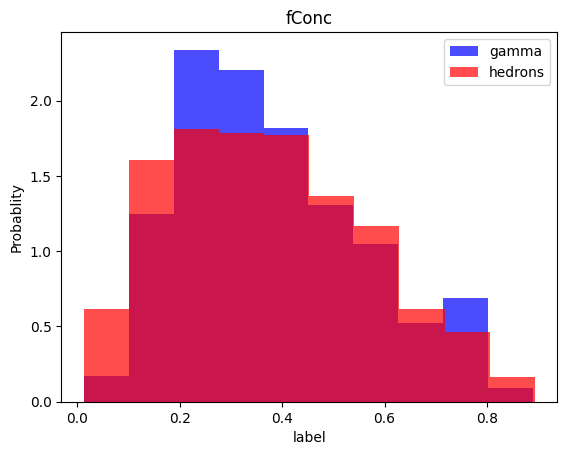

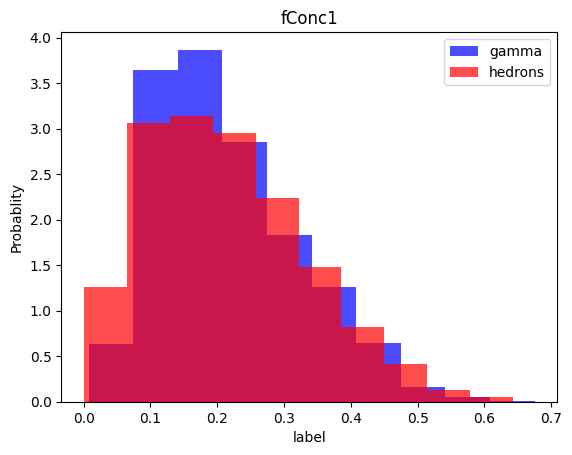

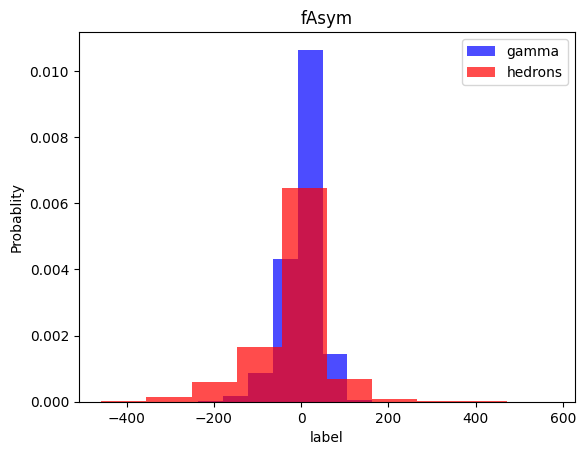

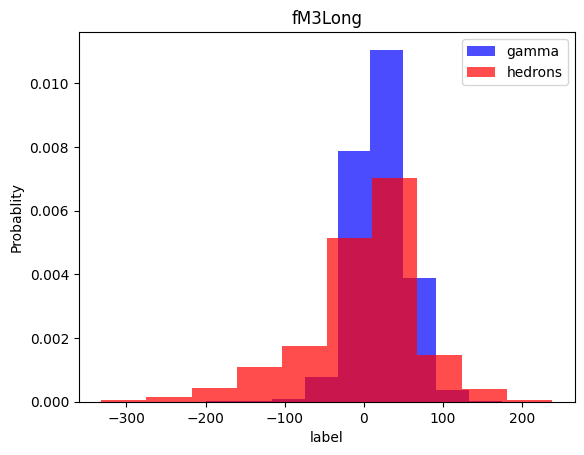

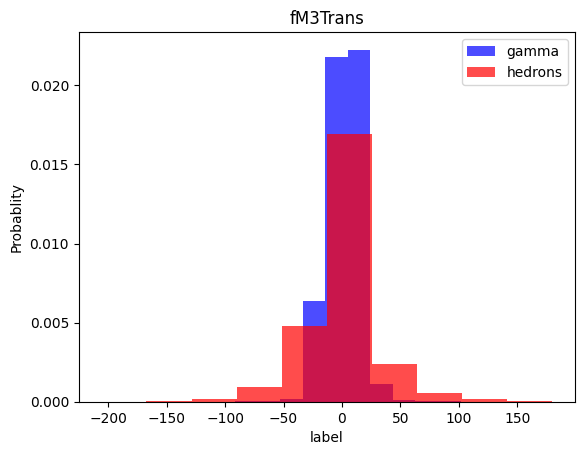

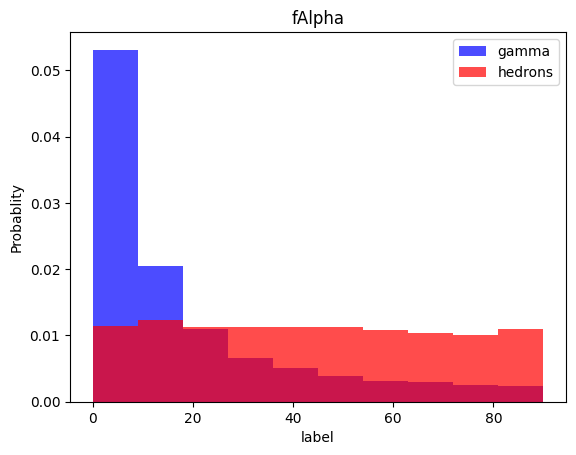

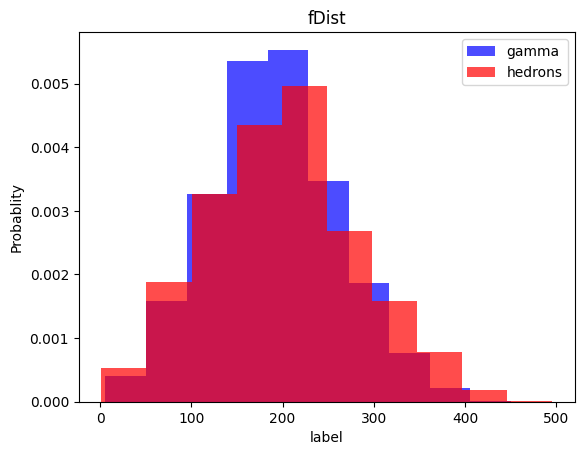

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color="red",label='hedrons',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel("label")
  plt.legend()
  plt.show()




In [ ]:
#train test validation dataset


In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])


In [ ]:
def scale_dataset(dataframe,oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  x=scaler.fit_transform(x)

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)

  data=np.hstack((x,np.reshape(y,(-1,1))))

  return data,x,y


In [ ]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)
test,x_test,y_test=scale_dataset(test,oversample=False)

In [ ]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #hedrons

IndexError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred=knn_model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1325
           1       0.83      0.90      0.86      2479

    accuracy                           0.82      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



Naive Bayesss


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model= GaussianNB()
nb_model= nb_model.fit(x_train,y_train)

In [ ]:
y_pred=nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.40      0.50      1325
           1       0.74      0.88      0.80      2479

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)

In [ ]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1325
           1       0.84      0.82      0.83      2479

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



SVM


In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)

In [ ]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1325
           1       0.89      0.90      0.90      2479

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax2.grid(True)
  plt.show()




In [ ]:
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation="relu",input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation="sigmoid")
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history=nn_model.fit(
    x_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2
  )
  return nn_model,history



Epoch 1/100
371/371 [==============================] - 3s 4ms/step - loss: 0.3928 - accuracy: 0.8317 - val_loss: 0.4969 - val_accuracy: 0.7443
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3482 - accuracy: 0.8511 - val_loss: 0.4997 - val_accuracy: 0.7092
Epoch 3/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8562 - val_loss: 0.4022 - val_accuracy: 0.7628
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8568 - val_loss: 0.5026 - val_accuracy: 0.7385
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3268 - accuracy: 0.8613 - val_loss: 0.6463 - val_accuracy: 0.6803
Epoch 6/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3281 - accuracy: 0.8600 - val_loss: 0.4975 - val_accuracy: 0.7409
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3241 - accuracy: 0.8594 - val_loss: 0.4951 - val_accuracy: 0.7197

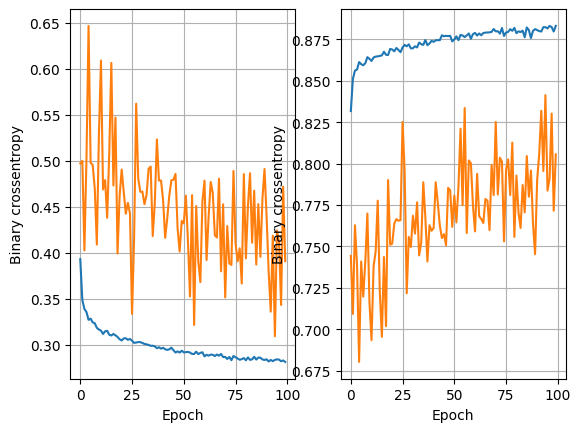

Epoch 1/100
186/186 [==============================] - 2s 4ms/step - loss: 0.4139 - accuracy: 0.8119 - val_loss: 0.4427 - val_accuracy: 0.7513
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3515 - accuracy: 0.8496 - val_loss: 0.4593 - val_accuracy: 0.7618
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.8538 - val_loss: 0.5929 - val_accuracy: 0.6759
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3351 - accuracy: 0.8595 - val_loss: 0.4973 - val_accuracy: 0.7449
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3262 - accuracy: 0.8610 - val_loss: 0.4492 - val_accuracy: 0.7662
Epoch 6/100
186/186 [==============================] - 0s 3ms/step - loss: 0.3267 - accuracy: 0.8620 - val_loss: 0.5089 - val_accuracy: 0.7224
Epoch 7/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3227 - accuracy: 0.8620 - val_loss: 0.5846 - val_accuracy: 0.6985

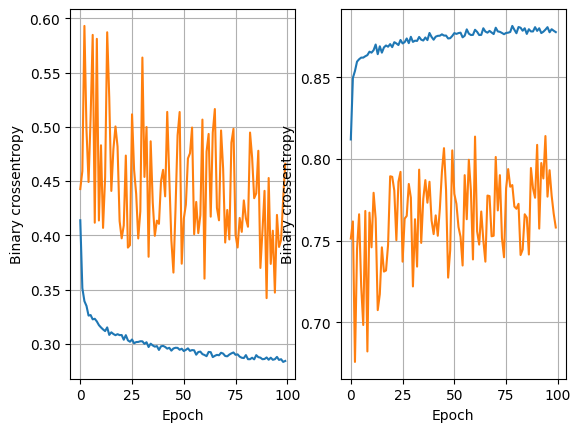

Epoch 1/100
93/93 [==============================] - 2s 5ms/step - loss: 0.4187 - accuracy: 0.8109 - val_loss: 0.5239 - val_accuracy: 0.7170
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8511 - val_loss: 0.6101 - val_accuracy: 0.6850
Epoch 3/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.8544 - val_loss: 0.5459 - val_accuracy: 0.7129
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3365 - accuracy: 0.8565 - val_loss: 0.4454 - val_accuracy: 0.7611
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8608 - val_loss: 0.4137 - val_accuracy: 0.7749
Epoch 6/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3244 - accuracy: 0.8602 - val_loss: 0.5300 - val_accuracy: 0.7214
Epoch 7/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.8634 - val_loss: 0.4105 - val_accuracy: 0.7925
Epoch 8/100
9

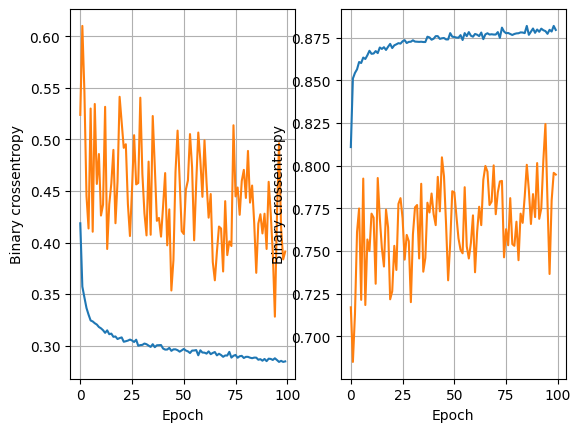

Epoch 1/100
371/371 [==============================] - 2s 3ms/step - loss: 0.4122 - accuracy: 0.8182 - val_loss: 0.3752 - val_accuracy: 0.8184
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3569 - accuracy: 0.8499 - val_loss: 0.4569 - val_accuracy: 0.7685
Epoch 3/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3451 - accuracy: 0.8532 - val_loss: 0.5964 - val_accuracy: 0.6934
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8574 - val_loss: 0.4911 - val_accuracy: 0.7463
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.8585 - val_loss: 0.4570 - val_accuracy: 0.7520
Epoch 6/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3261 - accuracy: 0.8608 - val_loss: 0.5421 - val_accuracy: 0.7156
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8624 - val_loss: 0.5424 - val_accuracy: 0.7204

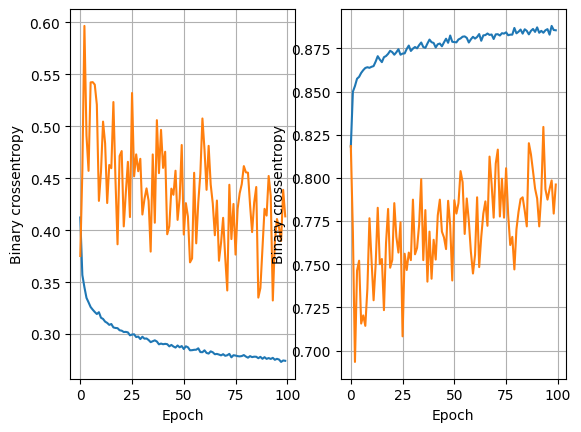

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.4445 - accuracy: 0.7887 - val_loss: 0.5342 - val_accuracy: 0.7079
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3607 - accuracy: 0.8488 - val_loss: 0.5799 - val_accuracy: 0.7156
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3466 - accuracy: 0.8531 - val_loss: 0.4438 - val_accuracy: 0.7672
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3376 - accuracy: 0.8554 - val_loss: 0.3794 - val_accuracy: 0.8113
Epoch 5/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8571 - val_loss: 0.5655 - val_accuracy: 0.7018
Epoch 6/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.8599 - val_loss: 0.4662 - val_accuracy: 0.7524
Epoch 7/100
186/186 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.8610 - val_loss: 0.4264 - val_accuracy: 0.7648

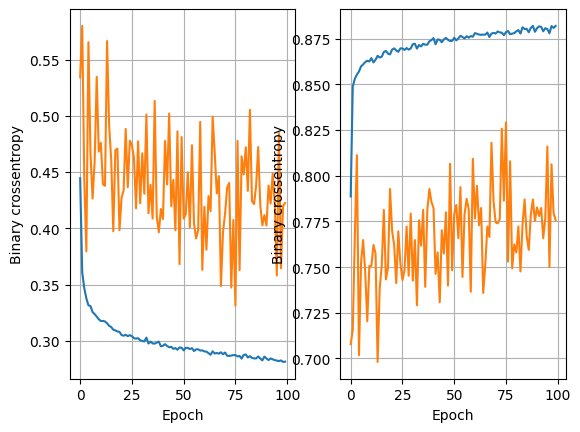

Epoch 1/100
93/93 [==============================] - 2s 5ms/step - loss: 0.4623 - accuracy: 0.7827 - val_loss: 0.5646 - val_accuracy: 0.6826
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3834 - accuracy: 0.8332 - val_loss: 0.5383 - val_accuracy: 0.7143
Epoch 3/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8467 - val_loss: 0.5158 - val_accuracy: 0.7389
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8526 - val_loss: 0.5527 - val_accuracy: 0.7170
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8547 - val_loss: 0.5468 - val_accuracy: 0.7244
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3362 - accuracy: 0.8600 - val_loss: 0.5283 - val_accuracy: 0.7281
Epoch 7/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.8584 - val_loss: 0.5237 - val_accuracy: 0.7227
Epoch 8/100
9

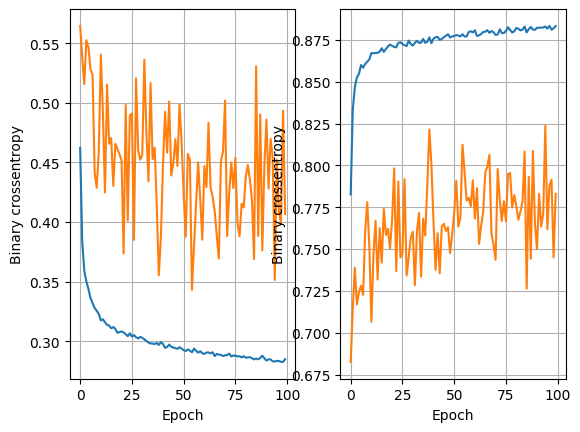

Epoch 1/100
371/371 [==============================] - 2s 3ms/step - loss: 0.5122 - accuracy: 0.7519 - val_loss: 0.6319 - val_accuracy: 0.6381
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8185 - val_loss: 0.5473 - val_accuracy: 0.6924
Epoch 3/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3781 - accuracy: 0.8375 - val_loss: 0.5477 - val_accuracy: 0.7059
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3636 - accuracy: 0.8474 - val_loss: 0.4924 - val_accuracy: 0.7470
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8525 - val_loss: 0.5403 - val_accuracy: 0.7204
Epoch 6/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.8530 - val_loss: 0.4870 - val_accuracy: 0.7470
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3471 - accuracy: 0.8534 - val_loss: 0.5450 - val_accuracy: 0.7214

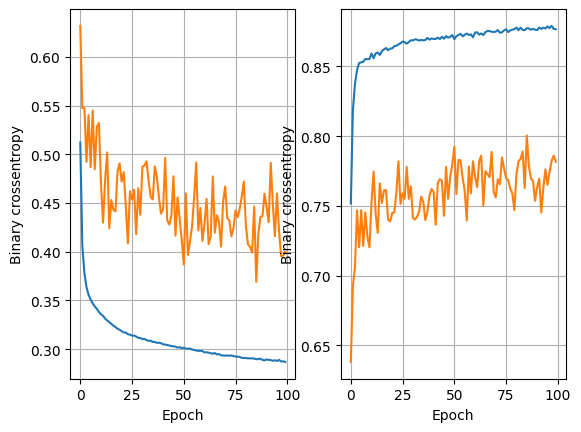

Epoch 1/100
186/186 [==============================] - 2s 4ms/step - loss: 0.5397 - accuracy: 0.7292 - val_loss: 0.7105 - val_accuracy: 0.5778
Epoch 2/100
186/186 [==============================] - 1s 3ms/step - loss: 0.4224 - accuracy: 0.8170 - val_loss: 0.6153 - val_accuracy: 0.6803
Epoch 3/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3947 - accuracy: 0.8317 - val_loss: 0.5246 - val_accuracy: 0.7443
Epoch 4/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.8385 - val_loss: 0.5449 - val_accuracy: 0.7294
Epoch 5/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3695 - accuracy: 0.8430 - val_loss: 0.5847 - val_accuracy: 0.7028
Epoch 6/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8456 - val_loss: 0.5189 - val_accuracy: 0.7412
Epoch 7/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8494 - val_loss: 0.5113 - val_accuracy: 0.7396

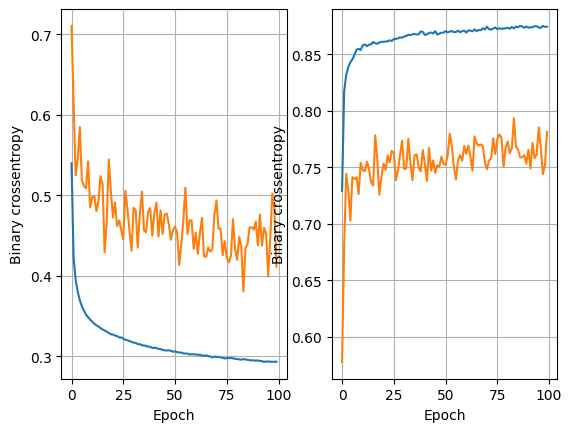

Epoch 1/100
93/93 [==============================] - 1s 5ms/step - loss: 0.5863 - accuracy: 0.7237 - val_loss: 0.6269 - val_accuracy: 0.5165
Epoch 2/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7999 - val_loss: 0.5890 - val_accuracy: 0.6371
Epoch 3/100
93/93 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8138 - val_loss: 0.6034 - val_accuracy: 0.6385
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.8246 - val_loss: 0.5550 - val_accuracy: 0.6867
Epoch 5/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8326 - val_loss: 0.5437 - val_accuracy: 0.6998
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8402 - val_loss: 0.5398 - val_accuracy: 0.7028
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3699 - accuracy: 0.8435 - val_loss: 0.5585 - val_accuracy: 0.6954
Epoch 8/100
9

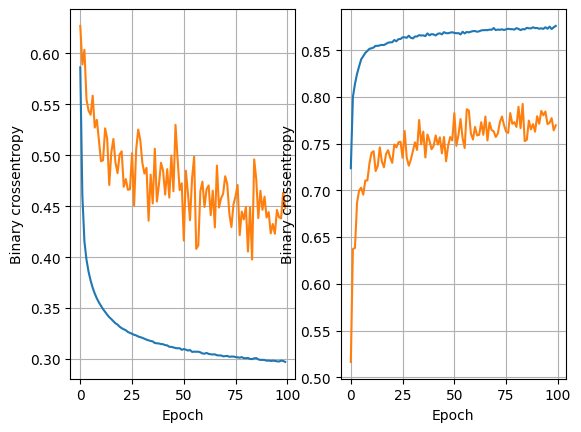

Epoch 1/100
371/371 [==============================] - 3s 5ms/step - loss: 0.4476 - accuracy: 0.7990 - val_loss: 0.5514 - val_accuracy: 0.6941
Epoch 2/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3876 - accuracy: 0.8352 - val_loss: 0.6254 - val_accuracy: 0.6503
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3743 - accuracy: 0.8401 - val_loss: 0.4903 - val_accuracy: 0.7072
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.8417 - val_loss: 0.4951 - val_accuracy: 0.7005
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8422 - val_loss: 0.4935 - val_accuracy: 0.7392
Epoch 6/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3611 - accuracy: 0.8512 - val_loss: 0.6235 - val_accuracy: 0.6560
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3644 - accuracy: 0.8459 - val_loss: 0.3982 - val_accuracy: 0.7456

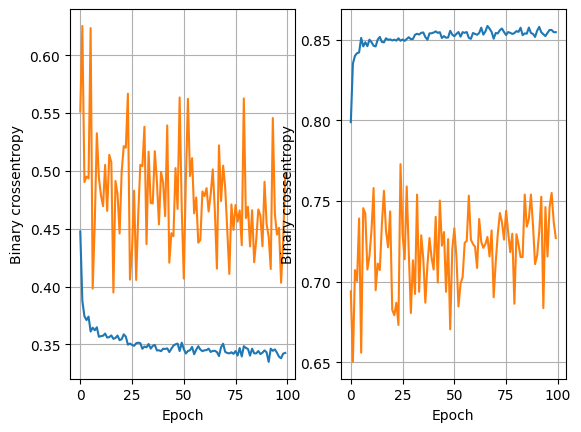

Epoch 1/100
186/186 [==============================] - 2s 5ms/step - loss: 0.4664 - accuracy: 0.7861 - val_loss: 0.6603 - val_accuracy: 0.6567
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4027 - accuracy: 0.8278 - val_loss: 0.5435 - val_accuracy: 0.7042
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3811 - accuracy: 0.8398 - val_loss: 0.5310 - val_accuracy: 0.7146
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3729 - accuracy: 0.8409 - val_loss: 0.5298 - val_accuracy: 0.7116
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3658 - accuracy: 0.8485 - val_loss: 0.5218 - val_accuracy: 0.7011
Epoch 6/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3642 - accuracy: 0.8482 - val_loss: 0.4437 - val_accuracy: 0.7490
Epoch 7/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3617 - accuracy: 0.8452 - val_loss: 0.5738 - val_accuracy: 0.6883

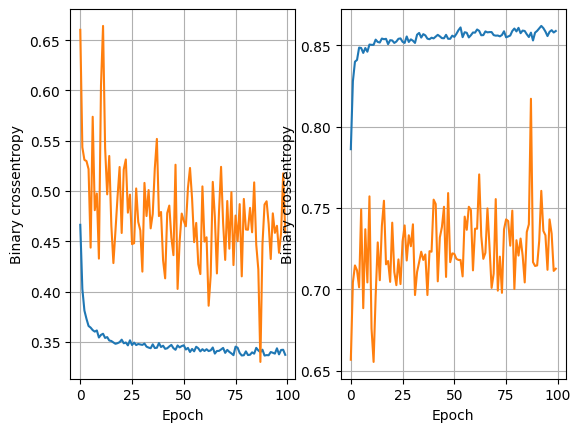

Epoch 1/100
93/93 [==============================] - 1s 5ms/step - loss: 0.4896 - accuracy: 0.7663 - val_loss: 0.6193 - val_accuracy: 0.6587
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 0.4178 - accuracy: 0.8145 - val_loss: 0.5474 - val_accuracy: 0.7234
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3926 - accuracy: 0.8350 - val_loss: 0.5130 - val_accuracy: 0.7086
Epoch 4/100
93/93 [==============================] - 0s 3ms/step - loss: 0.3757 - accuracy: 0.8400 - val_loss: 0.5578 - val_accuracy: 0.7123
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3737 - accuracy: 0.8424 - val_loss: 0.4740 - val_accuracy: 0.7375
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3649 - accuracy: 0.8475 - val_loss: 0.5235 - val_accuracy: 0.7018
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3627 - accuracy: 0.8472 - val_loss: 0.4956 - val_accuracy: 0.7207
Epoch 8/100
9

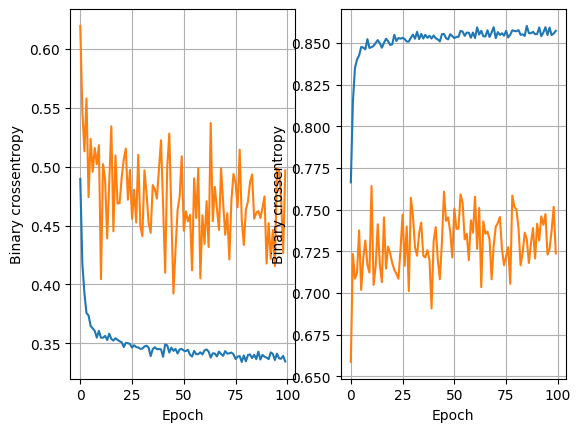

Epoch 1/100
371/371 [==============================] - 3s 3ms/step - loss: 0.4728 - accuracy: 0.7752 - val_loss: 0.4933 - val_accuracy: 0.7318
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4068 - accuracy: 0.8269 - val_loss: 0.5202 - val_accuracy: 0.7480
Epoch 3/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8369 - val_loss: 0.4830 - val_accuracy: 0.7318
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3807 - accuracy: 0.8413 - val_loss: 0.5243 - val_accuracy: 0.7092
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8461 - val_loss: 0.5417 - val_accuracy: 0.7005
Epoch 6/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3669 - accuracy: 0.8482 - val_loss: 0.4634 - val_accuracy: 0.7456
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.8505 - val_loss: 0.5614 - val_accuracy: 0.6978

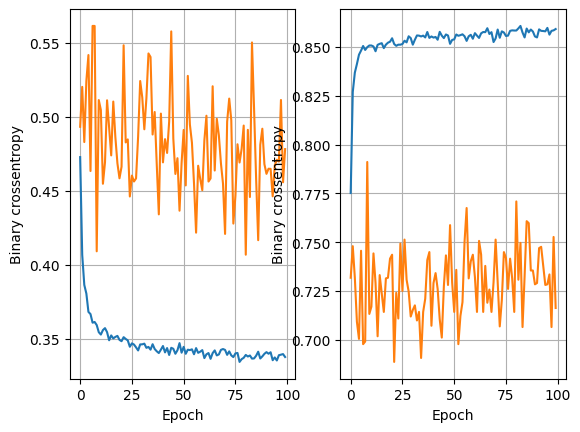

Epoch 1/100
186/186 [==============================] - 2s 4ms/step - loss: 0.4956 - accuracy: 0.7609 - val_loss: 0.5737 - val_accuracy: 0.6651
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.8166 - val_loss: 0.5920 - val_accuracy: 0.6617
Epoch 3/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3911 - accuracy: 0.8308 - val_loss: 0.5601 - val_accuracy: 0.7136
Epoch 4/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8407 - val_loss: 0.5178 - val_accuracy: 0.7190
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3738 - accuracy: 0.8431 - val_loss: 0.4599 - val_accuracy: 0.7389
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3711 - accuracy: 0.8461 - val_loss: 0.4667 - val_accuracy: 0.7244
Epoch 7/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3685 - accuracy: 0.8433 - val_loss: 0.4596 - val_accuracy: 0.7493

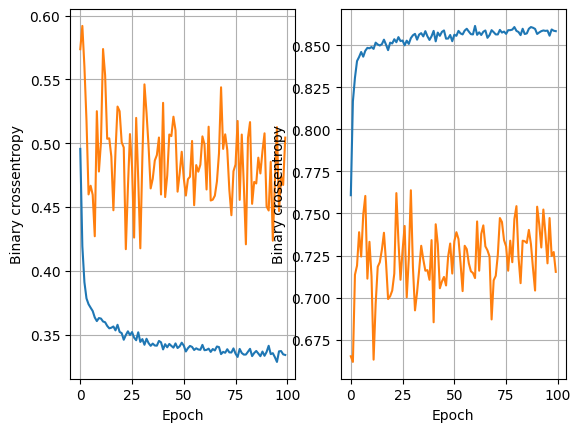

Epoch 1/100
93/93 [==============================] - 2s 9ms/step - loss: 0.5057 - accuracy: 0.7537 - val_loss: 0.5938 - val_accuracy: 0.6661
Epoch 2/100
93/93 [==============================] - 1s 6ms/step - loss: 0.4357 - accuracy: 0.8044 - val_loss: 0.5716 - val_accuracy: 0.6722
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4178 - accuracy: 0.8188 - val_loss: 0.5151 - val_accuracy: 0.7305
Epoch 4/100
93/93 [==============================] - 1s 5ms/step - loss: 0.3959 - accuracy: 0.8321 - val_loss: 0.5708 - val_accuracy: 0.6907
Epoch 5/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3827 - accuracy: 0.8399 - val_loss: 0.5125 - val_accuracy: 0.7338
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3745 - accuracy: 0.8441 - val_loss: 0.5296 - val_accuracy: 0.7200
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3669 - accuracy: 0.8474 - val_loss: 0.4928 - val_accuracy: 0.7369
Epoch 8/100
9

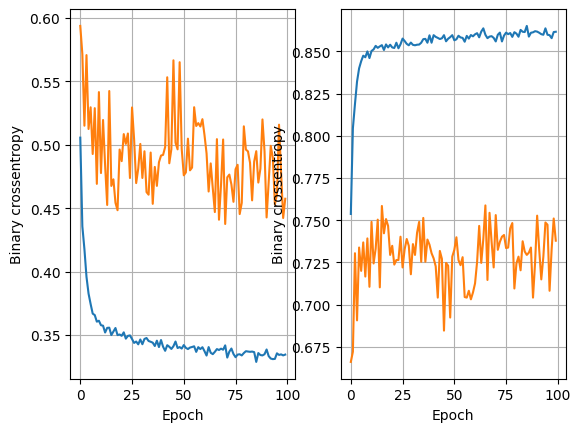

Epoch 1/100
371/371 [==============================] - 3s 4ms/step - loss: 0.5781 - accuracy: 0.7089 - val_loss: 0.6856 - val_accuracy: 0.5701
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4731 - accuracy: 0.7799 - val_loss: 0.6833 - val_accuracy: 0.5889
Epoch 3/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4458 - accuracy: 0.7950 - val_loss: 0.6290 - val_accuracy: 0.6301
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4304 - accuracy: 0.8079 - val_loss: 0.5918 - val_accuracy: 0.6627
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.8153 - val_loss: 0.5817 - val_accuracy: 0.6671
Epoch 6/100
371/371 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8179 - val_loss: 0.5852 - val_accuracy: 0.6880
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8257 - val_loss: 0.5442 - val_accuracy: 0.7089

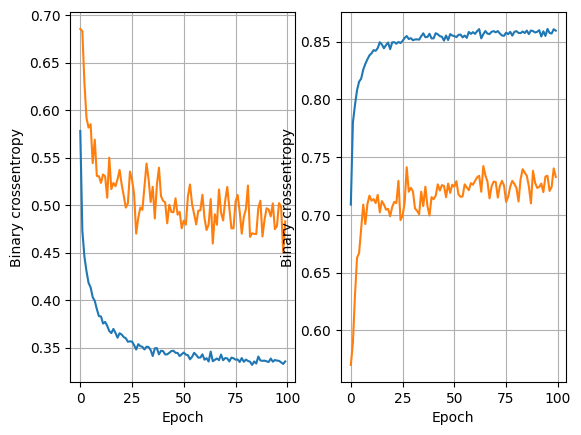

Epoch 1/100
186/186 [==============================] - 2s 5ms/step - loss: 0.6591 - accuracy: 0.6501 - val_loss: 0.7152 - val_accuracy: 0.5586
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.6459 - val_accuracy: 0.6102
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4694 - accuracy: 0.7871 - val_loss: 0.6680 - val_accuracy: 0.5954
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4499 - accuracy: 0.7980 - val_loss: 0.6089 - val_accuracy: 0.6466
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4391 - accuracy: 0.8069 - val_loss: 0.5941 - val_accuracy: 0.6594
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4305 - accuracy: 0.8092 - val_loss: 0.5747 - val_accuracy: 0.6749
Epoch 7/100
186/186 [==============================] - 1s 4ms/step - loss: 0.4194 - accuracy: 0.8172 - val_loss: 0.5800 - val_accuracy: 0.6830

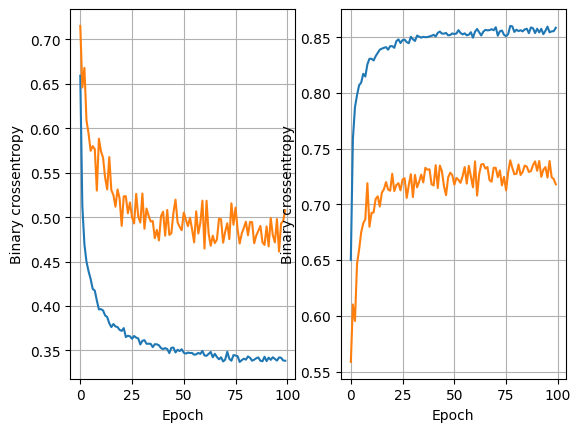

Epoch 1/100
93/93 [==============================] - 2s 8ms/step - loss: 0.6795 - accuracy: 0.6144 - val_loss: 0.7447 - val_accuracy: 0.3430
Epoch 2/100
93/93 [==============================] - 1s 6ms/step - loss: 0.5565 - accuracy: 0.7230 - val_loss: 0.6955 - val_accuracy: 0.4939
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4933 - accuracy: 0.7595 - val_loss: 0.6624 - val_accuracy: 0.5735
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.7788 - val_loss: 0.6305 - val_accuracy: 0.6176
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.7884 - val_loss: 0.6514 - val_accuracy: 0.6082
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.7953 - val_loss: 0.6386 - val_accuracy: 0.6243
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.8013 - val_loss: 0.6070 - val_accuracy: 0.6523
Epoch 8/100
9

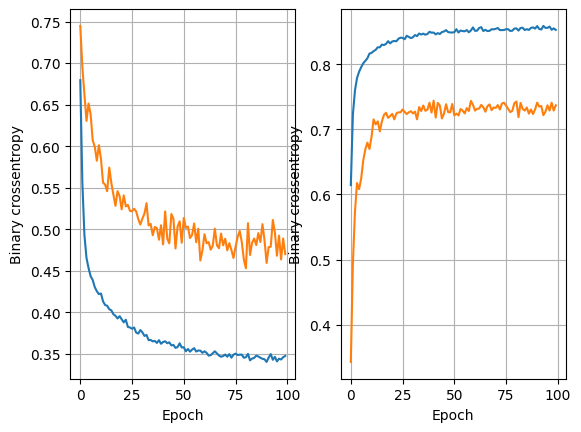

Epoch 1/100
371/371 [==============================] - 2s 3ms/step - loss: 0.3900 - accuracy: 0.8274 - val_loss: 0.4561 - val_accuracy: 0.7766
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8508 - val_loss: 0.4842 - val_accuracy: 0.7308
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8582 - val_loss: 0.4649 - val_accuracy: 0.7517
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8605 - val_loss: 0.4328 - val_accuracy: 0.7780
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3249 - accuracy: 0.8615 - val_loss: 0.3704 - val_accuracy: 0.8228
Epoch 6/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3232 - accuracy: 0.8619 - val_loss: 0.4197 - val_accuracy: 0.7716
Epoch 7/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.8624 - val_loss: 0.4685 - val_accuracy: 0.7436

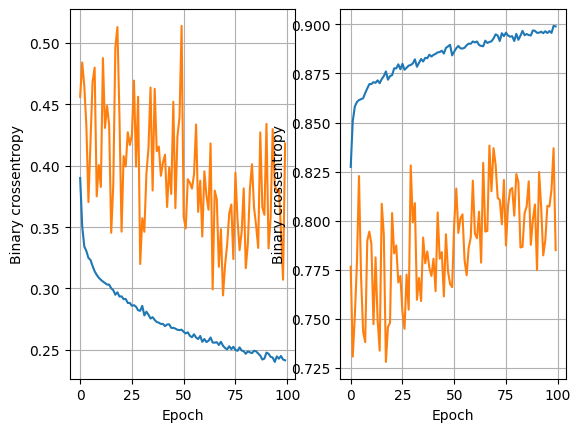

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.3944 - accuracy: 0.8267 - val_loss: 0.6196 - val_accuracy: 0.6691
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.8522 - val_loss: 0.4195 - val_accuracy: 0.7581
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3374 - accuracy: 0.8584 - val_loss: 0.4378 - val_accuracy: 0.7551
Epoch 4/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3276 - accuracy: 0.8625 - val_loss: 0.4489 - val_accuracy: 0.7594
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3226 - accuracy: 0.8634 - val_loss: 0.3927 - val_accuracy: 0.7874
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3207 - accuracy: 0.8616 - val_loss: 0.4938 - val_accuracy: 0.7348
Epoch 7/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3143 - accuracy: 0.8679 - val_loss: 0.5075 - val_accuracy: 0.7187

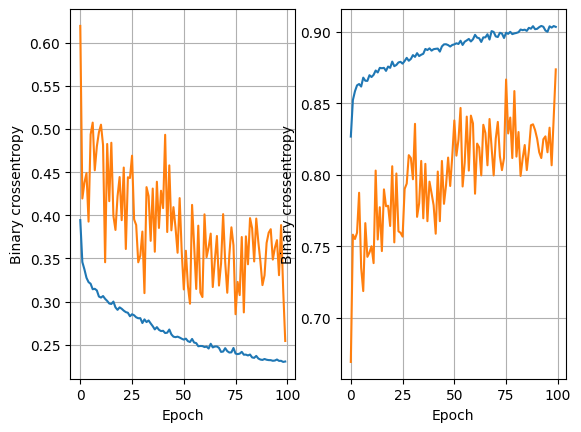

Epoch 1/100
93/93 [==============================] - 1s 6ms/step - loss: 0.4107 - accuracy: 0.8145 - val_loss: 0.3978 - val_accuracy: 0.7830
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.8542 - val_loss: 0.4859 - val_accuracy: 0.7466
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3318 - accuracy: 0.8584 - val_loss: 0.3203 - val_accuracy: 0.8332
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3289 - accuracy: 0.8577 - val_loss: 0.4561 - val_accuracy: 0.7372
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3203 - accuracy: 0.8617 - val_loss: 0.4212 - val_accuracy: 0.7726
Epoch 6/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.8636 - val_loss: 0.4972 - val_accuracy: 0.7402
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3176 - accuracy: 0.8659 - val_loss: 0.4565 - val_accuracy: 0.7534
Epoch 8/100
9

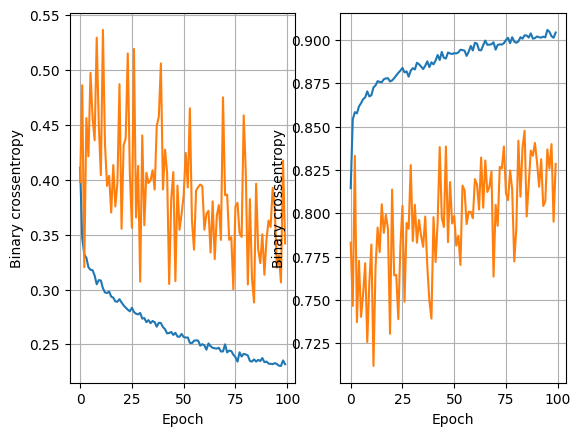

Epoch 1/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3977 - accuracy: 0.8260 - val_loss: 0.4475 - val_accuracy: 0.7527
Epoch 2/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3445 - accuracy: 0.8552 - val_loss: 0.4615 - val_accuracy: 0.7652
Epoch 3/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8574 - val_loss: 0.4330 - val_accuracy: 0.7601
Epoch 4/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3250 - accuracy: 0.8637 - val_loss: 0.4460 - val_accuracy: 0.7497
Epoch 5/100
371/371 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8645 - val_loss: 0.4527 - val_accuracy: 0.7426
Epoch 6/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8648 - val_loss: 0.4828 - val_accuracy: 0.7473
Epoch 7/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3118 - accuracy: 0.8691 - val_loss: 0.5604 - val_accuracy: 0.7190

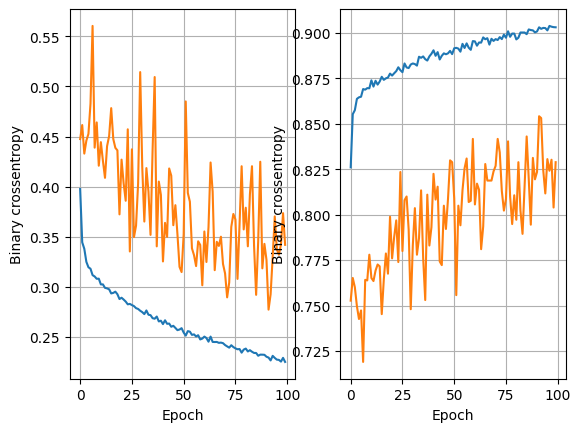

Epoch 1/100
186/186 [==============================] - 2s 5ms/step - loss: 0.4139 - accuracy: 0.8110 - val_loss: 0.4727 - val_accuracy: 0.7406
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3499 - accuracy: 0.8520 - val_loss: 0.4571 - val_accuracy: 0.7689
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3404 - accuracy: 0.8563 - val_loss: 0.5182 - val_accuracy: 0.7241
Epoch 4/100
186/186 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8616 - val_loss: 0.4921 - val_accuracy: 0.7490
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8624 - val_loss: 0.4923 - val_accuracy: 0.7402
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3200 - accuracy: 0.8633 - val_loss: 0.4926 - val_accuracy: 0.7338
Epoch 7/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3166 - accuracy: 0.8652 - val_loss: 0.4095 - val_accuracy: 0.7716

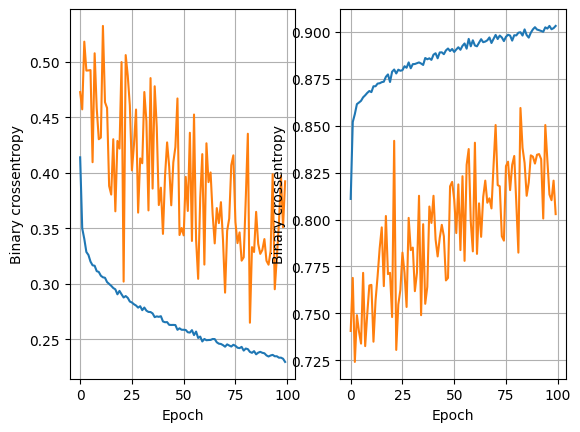

Epoch 1/100
93/93 [==============================] - 1s 6ms/step - loss: 0.4180 - accuracy: 0.8203 - val_loss: 0.5821 - val_accuracy: 0.6927
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3531 - accuracy: 0.8519 - val_loss: 0.5662 - val_accuracy: 0.7139
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3407 - accuracy: 0.8575 - val_loss: 0.4958 - val_accuracy: 0.7470
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.8599 - val_loss: 0.4961 - val_accuracy: 0.7399
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8600 - val_loss: 0.5150 - val_accuracy: 0.7291
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3235 - accuracy: 0.8643 - val_loss: 0.3836 - val_accuracy: 0.8032
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3192 - accuracy: 0.8650 - val_loss: 0.4606 - val_accuracy: 0.7631
Epoch 8/100
9

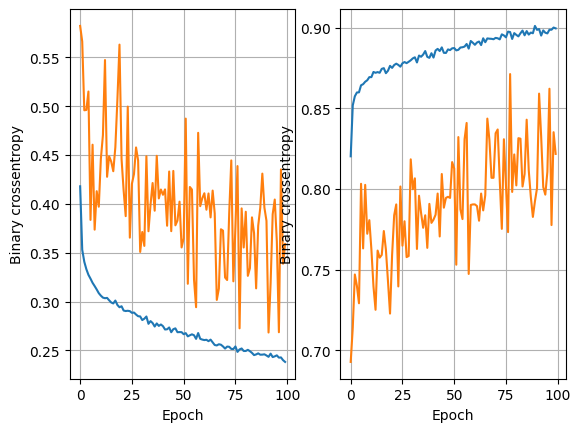

Epoch 1/100
371/371 [==============================] - 3s 5ms/step - loss: 0.4661 - accuracy: 0.7832 - val_loss: 0.5923 - val_accuracy: 0.6523
Epoch 2/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3748 - accuracy: 0.8388 - val_loss: 0.4700 - val_accuracy: 0.7544
Epoch 3/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3543 - accuracy: 0.8509 - val_loss: 0.4820 - val_accuracy: 0.7534
Epoch 4/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3436 - accuracy: 0.8558 - val_loss: 0.5388 - val_accuracy: 0.7180
Epoch 5/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3379 - accuracy: 0.8563 - val_loss: 0.5172 - val_accuracy: 0.7298
Epoch 6/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3339 - accuracy: 0.8587 - val_loss: 0.4805 - val_accuracy: 0.7436
Epoch 7/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3292 - accuracy: 0.8589 - val_loss: 0.4620 - val_accuracy: 0.7487

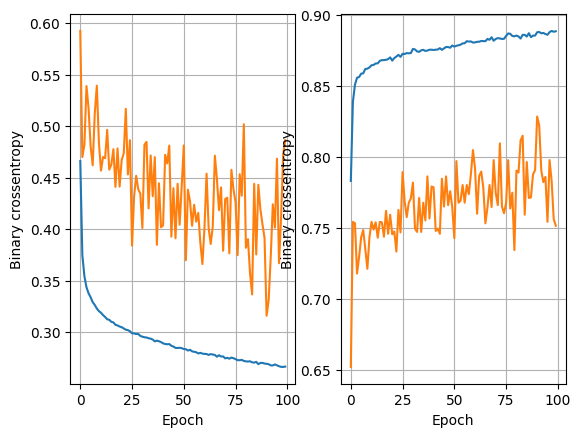

Epoch 1/100
186/186 [==============================] - 2s 5ms/step - loss: 0.4981 - accuracy: 0.7559 - val_loss: 0.5721 - val_accuracy: 0.6701
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3931 - accuracy: 0.8248 - val_loss: 0.5416 - val_accuracy: 0.7011
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3668 - accuracy: 0.8448 - val_loss: 0.5232 - val_accuracy: 0.7204
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3506 - accuracy: 0.8534 - val_loss: 0.5819 - val_accuracy: 0.6981
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3432 - accuracy: 0.8553 - val_loss: 0.4999 - val_accuracy: 0.7436
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3382 - accuracy: 0.8569 - val_loss: 0.4943 - val_accuracy: 0.7443
Epoch 7/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3344 - accuracy: 0.8604 - val_loss: 0.4827 - val_accuracy: 0.7429

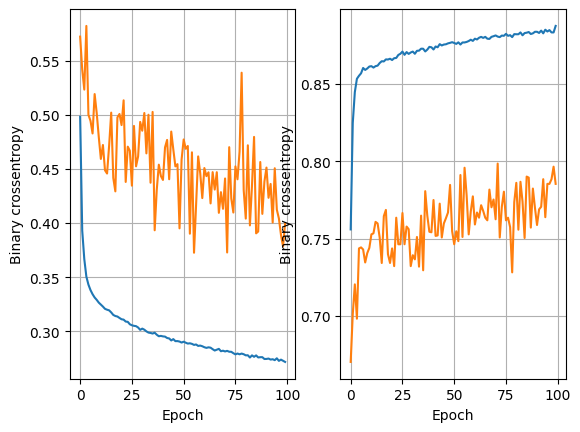

Epoch 1/100
93/93 [==============================] - 1s 6ms/step - loss: 0.5407 - accuracy: 0.7581 - val_loss: 0.6546 - val_accuracy: 0.5964
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 0.4180 - accuracy: 0.8096 - val_loss: 0.5969 - val_accuracy: 0.6536
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3910 - accuracy: 0.8259 - val_loss: 0.5507 - val_accuracy: 0.6968
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3752 - accuracy: 0.8366 - val_loss: 0.4692 - val_accuracy: 0.7554
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3636 - accuracy: 0.8445 - val_loss: 0.5078 - val_accuracy: 0.7406
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8500 - val_loss: 0.5182 - val_accuracy: 0.7362
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3480 - accuracy: 0.8543 - val_loss: 0.5164 - val_accuracy: 0.7399
Epoch 8/100
9

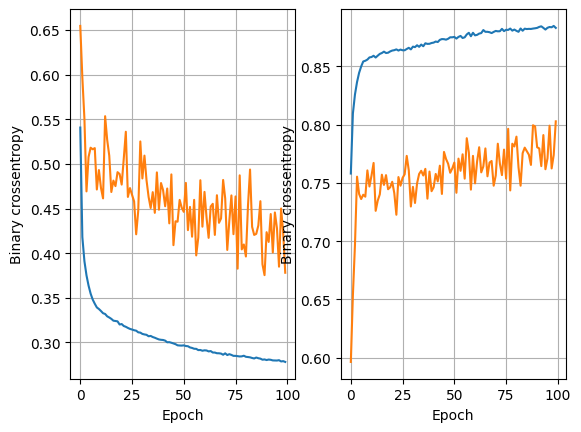

Epoch 1/100
371/371 [==============================] - 2s 4ms/step - loss: 0.4236 - accuracy: 0.8172 - val_loss: 0.5541 - val_accuracy: 0.6890
Epoch 2/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3745 - accuracy: 0.8419 - val_loss: 0.4213 - val_accuracy: 0.7756
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3617 - accuracy: 0.8482 - val_loss: 0.4854 - val_accuracy: 0.7106
Epoch 4/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3612 - accuracy: 0.8484 - val_loss: 0.5985 - val_accuracy: 0.6301
Epoch 5/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3533 - accuracy: 0.8488 - val_loss: 0.6403 - val_accuracy: 0.6459
Epoch 6/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8498 - val_loss: 0.4717 - val_accuracy: 0.7318
Epoch 7/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3447 - accuracy: 0.8539 - val_loss: 0.4087 - val_accuracy: 0.7662

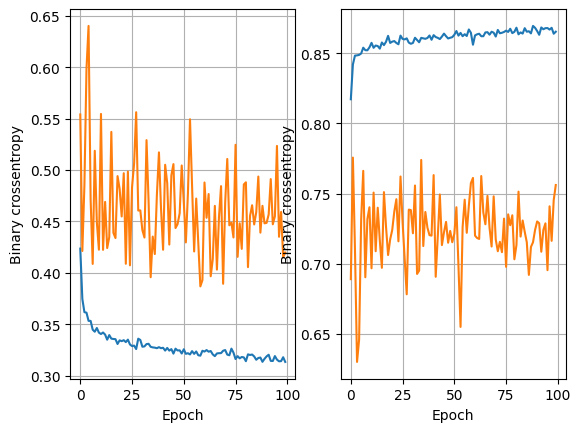

Epoch 1/100
186/186 [==============================] - 2s 5ms/step - loss: 0.4253 - accuracy: 0.8114 - val_loss: 0.7023 - val_accuracy: 0.6088
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3737 - accuracy: 0.8409 - val_loss: 0.5272 - val_accuracy: 0.6937
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3612 - accuracy: 0.8466 - val_loss: 0.5076 - val_accuracy: 0.6924
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3515 - accuracy: 0.8519 - val_loss: 0.5219 - val_accuracy: 0.6917
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3459 - accuracy: 0.8529 - val_loss: 0.4585 - val_accuracy: 0.7332
Epoch 6/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3476 - accuracy: 0.8529 - val_loss: 0.4367 - val_accuracy: 0.7571
Epoch 7/100
186/186 [==============================] - 1s 6ms/step - loss: 0.3427 - accuracy: 0.8533 - val_loss: 0.4878 - val_accuracy: 0.7234

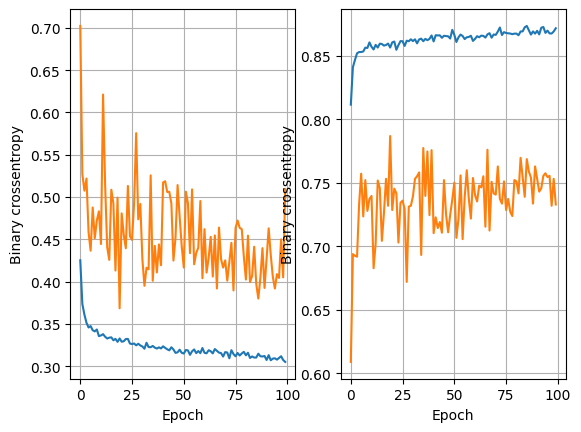

Epoch 1/100
93/93 [==============================] - 2s 7ms/step - loss: 0.4447 - accuracy: 0.7995 - val_loss: 0.5848 - val_accuracy: 0.6779
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3826 - accuracy: 0.8350 - val_loss: 0.5446 - val_accuracy: 0.7166
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3616 - accuracy: 0.8456 - val_loss: 0.4174 - val_accuracy: 0.7628
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3541 - accuracy: 0.8493 - val_loss: 0.5028 - val_accuracy: 0.7173
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3511 - accuracy: 0.8536 - val_loss: 0.4517 - val_accuracy: 0.7554
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3481 - accuracy: 0.8546 - val_loss: 0.4460 - val_accuracy: 0.7217
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8529 - val_loss: 0.4845 - val_accuracy: 0.7419
Epoch 8/100
9

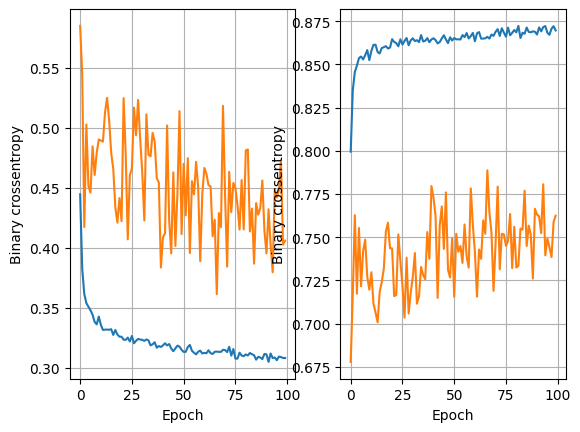

Epoch 1/100
371/371 [==============================] - 3s 5ms/step - loss: 0.4374 - accuracy: 0.8052 - val_loss: 0.4951 - val_accuracy: 0.7399
Epoch 2/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3783 - accuracy: 0.8459 - val_loss: 0.5129 - val_accuracy: 0.7305
Epoch 3/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3593 - accuracy: 0.8482 - val_loss: 0.5824 - val_accuracy: 0.6819
Epoch 4/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3527 - accuracy: 0.8515 - val_loss: 0.5969 - val_accuracy: 0.6853
Epoch 5/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3464 - accuracy: 0.8566 - val_loss: 0.4197 - val_accuracy: 0.7732
Epoch 6/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3422 - accuracy: 0.8557 - val_loss: 0.5183 - val_accuracy: 0.7308
Epoch 7/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3441 - accuracy: 0.8552 - val_loss: 0.4364 - val_accuracy: 0.7648

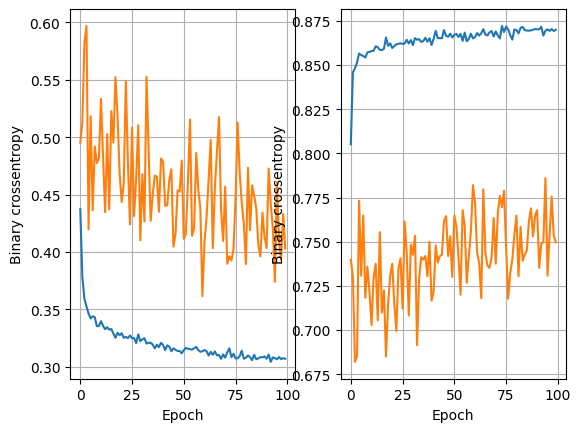

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.4494 - accuracy: 0.7954 - val_loss: 0.4995 - val_accuracy: 0.7241
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3899 - accuracy: 0.8381 - val_loss: 0.5410 - val_accuracy: 0.7072
Epoch 3/100
186/186 [==============================] - 1s 6ms/step - loss: 0.3706 - accuracy: 0.8450 - val_loss: 0.4819 - val_accuracy: 0.7416
Epoch 4/100
186/186 [==============================] - 1s 6ms/step - loss: 0.3599 - accuracy: 0.8488 - val_loss: 0.4585 - val_accuracy: 0.7382
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3499 - accuracy: 0.8543 - val_loss: 0.5825 - val_accuracy: 0.6971
Epoch 6/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3504 - accuracy: 0.8524 - val_loss: 0.4543 - val_accuracy: 0.7443
Epoch 7/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3462 - accuracy: 0.8547 - val_loss: 0.4298 - val_accuracy: 0.7510

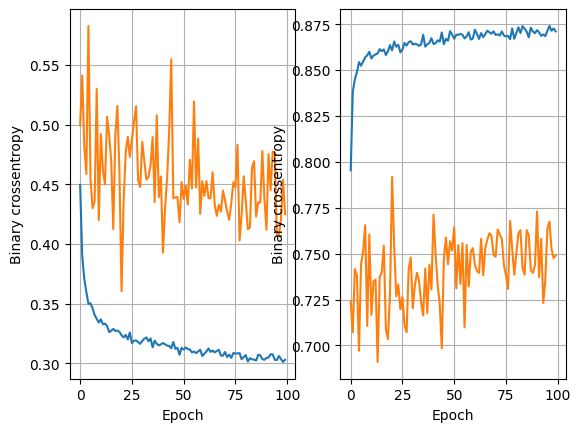

Epoch 1/100
93/93 [==============================] - 2s 9ms/step - loss: 0.4845 - accuracy: 0.7688 - val_loss: 0.5924 - val_accuracy: 0.6503
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4159 - accuracy: 0.8161 - val_loss: 0.4872 - val_accuracy: 0.7500
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3777 - accuracy: 0.8398 - val_loss: 0.5584 - val_accuracy: 0.7197
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3705 - accuracy: 0.8472 - val_loss: 0.5119 - val_accuracy: 0.7241
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3592 - accuracy: 0.8482 - val_loss: 0.4551 - val_accuracy: 0.7493
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3486 - accuracy: 0.8539 - val_loss: 0.4950 - val_accuracy: 0.7281
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3469 - accuracy: 0.8525 - val_loss: 0.4701 - val_accuracy: 0.7379
Epoch 8/100
9

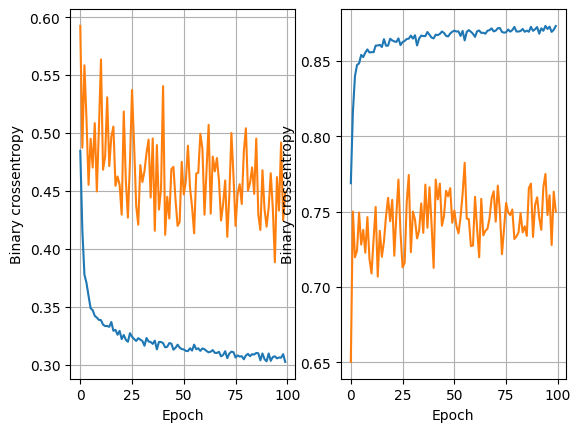

Epoch 1/100
371/371 [==============================] - 3s 5ms/step - loss: 0.5250 - accuracy: 0.7428 - val_loss: 0.6022 - val_accuracy: 0.6469
Epoch 2/100
371/371 [==============================] - 2s 5ms/step - loss: 0.4254 - accuracy: 0.8110 - val_loss: 0.5589 - val_accuracy: 0.6883
Epoch 3/100
371/371 [==============================] - 2s 4ms/step - loss: 0.4047 - accuracy: 0.8232 - val_loss: 0.5172 - val_accuracy: 0.7200
Epoch 4/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3886 - accuracy: 0.8354 - val_loss: 0.5274 - val_accuracy: 0.7143
Epoch 5/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3801 - accuracy: 0.8379 - val_loss: 0.5204 - val_accuracy: 0.7244
Epoch 6/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3727 - accuracy: 0.8448 - val_loss: 0.5241 - val_accuracy: 0.7244
Epoch 7/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3689 - accuracy: 0.8444 - val_loss: 0.5062 - val_accuracy: 0.7241

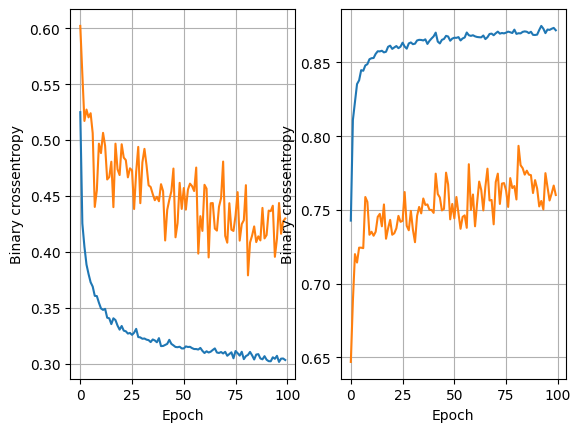

Epoch 1/100
186/186 [==============================] - 3s 8ms/step - loss: 0.5187 - accuracy: 0.7520 - val_loss: 0.6804 - val_accuracy: 0.5974
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 0.4403 - accuracy: 0.7998 - val_loss: 0.6144 - val_accuracy: 0.6432
Epoch 3/100
186/186 [==============================] - 1s 5ms/step - loss: 0.4211 - accuracy: 0.8141 - val_loss: 0.5663 - val_accuracy: 0.6863
Epoch 4/100
186/186 [==============================] - 1s 5ms/step - loss: 0.4082 - accuracy: 0.8220 - val_loss: 0.5474 - val_accuracy: 0.7055
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 0.4016 - accuracy: 0.8278 - val_loss: 0.5719 - val_accuracy: 0.6917
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3895 - accuracy: 0.8354 - val_loss: 0.6046 - val_accuracy: 0.6759
Epoch 7/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3836 - accuracy: 0.8371 - val_loss: 0.5115 - val_accuracy: 0.7321

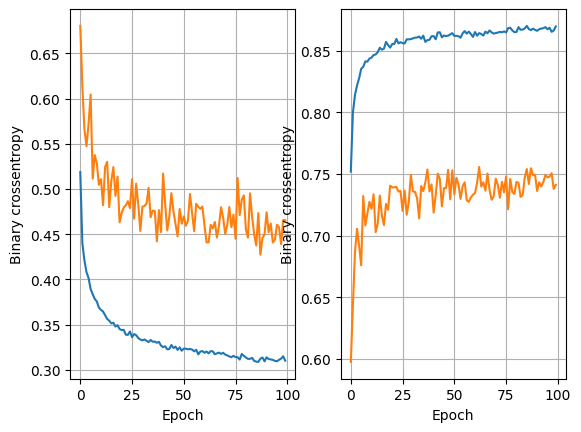

Epoch 1/100
93/93 [==============================] - 2s 7ms/step - loss: 0.6143 - accuracy: 0.6687 - val_loss: 0.6248 - val_accuracy: 0.5987
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4742 - accuracy: 0.7853 - val_loss: 0.6410 - val_accuracy: 0.6213
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4378 - accuracy: 0.7991 - val_loss: 0.5854 - val_accuracy: 0.6648
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.4216 - accuracy: 0.8118 - val_loss: 0.5406 - val_accuracy: 0.7001
Epoch 5/100
93/93 [==============================] - 1s 6ms/step - loss: 0.4122 - accuracy: 0.8186 - val_loss: 0.5695 - val_accuracy: 0.6870
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3980 - accuracy: 0.8288 - val_loss: 0.5418 - val_accuracy: 0.7092
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3921 - accuracy: 0.8332 - val_loss: 0.5423 - val_accuracy: 0.7113
Epoch 8/100
9

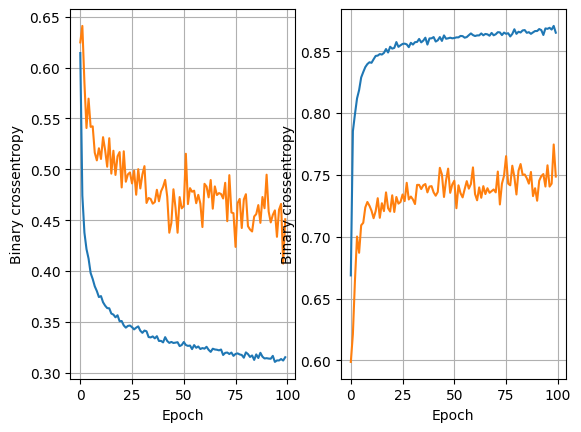

Epoch 1/100
371/371 [==============================] - 3s 5ms/step - loss: 0.3866 - accuracy: 0.8348 - val_loss: 0.5242 - val_accuracy: 0.7446
Epoch 2/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3475 - accuracy: 0.8525 - val_loss: 0.4243 - val_accuracy: 0.7743
Epoch 3/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3354 - accuracy: 0.8581 - val_loss: 0.4987 - val_accuracy: 0.7433
Epoch 4/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3283 - accuracy: 0.8578 - val_loss: 0.4848 - val_accuracy: 0.7261
Epoch 5/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3238 - accuracy: 0.8635 - val_loss: 0.4823 - val_accuracy: 0.7241
Epoch 6/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3203 - accuracy: 0.8632 - val_loss: 0.3869 - val_accuracy: 0.7975
Epoch 7/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3178 - accuracy: 0.8664 - val_loss: 0.4993 - val_accuracy: 0.7230

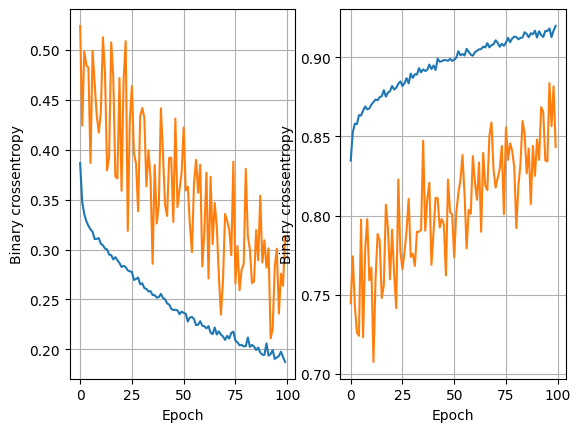

Epoch 1/100
186/186 [==============================] - 2s 5ms/step - loss: 0.3915 - accuracy: 0.8277 - val_loss: 0.4747 - val_accuracy: 0.7517
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3450 - accuracy: 0.8529 - val_loss: 0.4216 - val_accuracy: 0.7807
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3369 - accuracy: 0.8557 - val_loss: 0.4199 - val_accuracy: 0.7527
Epoch 4/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3257 - accuracy: 0.8622 - val_loss: 0.5090 - val_accuracy: 0.7385
Epoch 5/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3257 - accuracy: 0.8637 - val_loss: 0.4693 - val_accuracy: 0.7476
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3171 - accuracy: 0.8652 - val_loss: 0.4861 - val_accuracy: 0.7348
Epoch 7/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3139 - accuracy: 0.8655 - val_loss: 0.3807 - val_accuracy: 0.7854

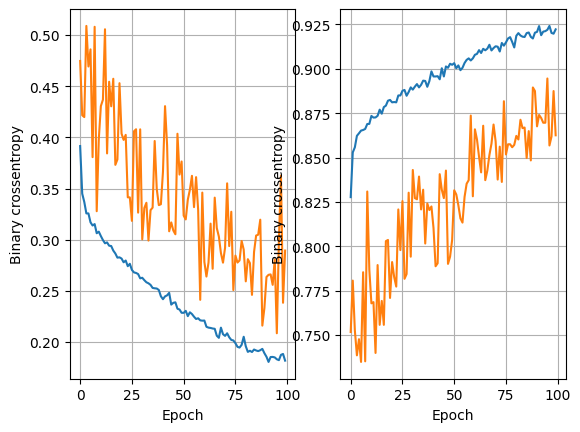

Epoch 1/100
93/93 [==============================] - 1s 7ms/step - loss: 0.4045 - accuracy: 0.8180 - val_loss: 0.6283 - val_accuracy: 0.6543
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3431 - accuracy: 0.8512 - val_loss: 0.4744 - val_accuracy: 0.7493
Epoch 3/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.8594 - val_loss: 0.4584 - val_accuracy: 0.7429
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.8622 - val_loss: 0.3807 - val_accuracy: 0.7911
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3198 - accuracy: 0.8654 - val_loss: 0.4688 - val_accuracy: 0.7517
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.8667 - val_loss: 0.3769 - val_accuracy: 0.8049
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8666 - val_loss: 0.4666 - val_accuracy: 0.7692
Epoch 8/100
9

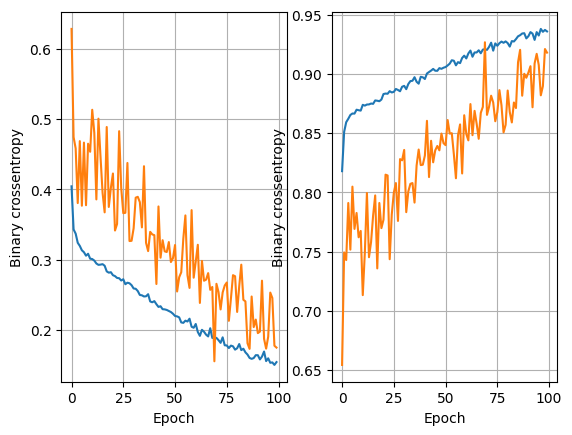

Epoch 1/100
371/371 [==============================] - 3s 5ms/step - loss: 0.3853 - accuracy: 0.8339 - val_loss: 0.4846 - val_accuracy: 0.7483
Epoch 2/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3401 - accuracy: 0.8551 - val_loss: 0.5284 - val_accuracy: 0.7163
Epoch 3/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3311 - accuracy: 0.8595 - val_loss: 0.5338 - val_accuracy: 0.7409
Epoch 4/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3252 - accuracy: 0.8611 - val_loss: 0.4864 - val_accuracy: 0.7446
Epoch 5/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3174 - accuracy: 0.8646 - val_loss: 0.4451 - val_accuracy: 0.7483
Epoch 6/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3147 - accuracy: 0.8678 - val_loss: 0.4810 - val_accuracy: 0.7385
Epoch 7/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3136 - accuracy: 0.8662 - val_loss: 0.5223 - val_accuracy: 0.7163

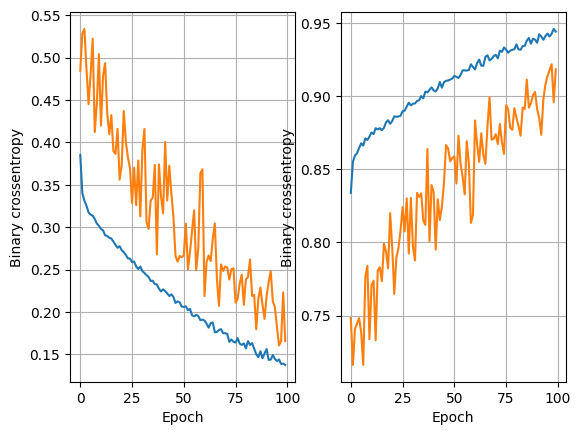

Epoch 1/100
186/186 [==============================] - 2s 5ms/step - loss: 0.3911 - accuracy: 0.8301 - val_loss: 0.4820 - val_accuracy: 0.7493
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.8531 - val_loss: 0.5479 - val_accuracy: 0.7075
Epoch 3/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3326 - accuracy: 0.8595 - val_loss: 0.3995 - val_accuracy: 0.7803
Epoch 4/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3219 - accuracy: 0.8627 - val_loss: 0.5047 - val_accuracy: 0.7268
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3198 - accuracy: 0.8638 - val_loss: 0.4276 - val_accuracy: 0.7598
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3162 - accuracy: 0.8680 - val_loss: 0.5410 - val_accuracy: 0.7365
Epoch 7/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3090 - accuracy: 0.8676 - val_loss: 0.4435 - val_accuracy: 0.7759

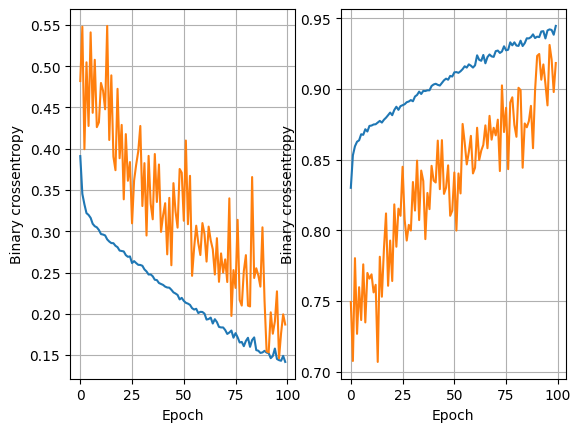

Epoch 1/100
93/93 [==============================] - 1s 6ms/step - loss: 0.4140 - accuracy: 0.8165 - val_loss: 0.6348 - val_accuracy: 0.6732
Epoch 2/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3498 - accuracy: 0.8536 - val_loss: 0.5185 - val_accuracy: 0.7446
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8573 - val_loss: 0.4448 - val_accuracy: 0.7551
Epoch 4/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3326 - accuracy: 0.8583 - val_loss: 0.5491 - val_accuracy: 0.7086
Epoch 5/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3217 - accuracy: 0.8670 - val_loss: 0.5577 - val_accuracy: 0.7035
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3175 - accuracy: 0.8655 - val_loss: 0.4568 - val_accuracy: 0.7419
Epoch 7/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.8641 - val_loss: 0.4706 - val_accuracy: 0.7385
Epoch 8/100
9

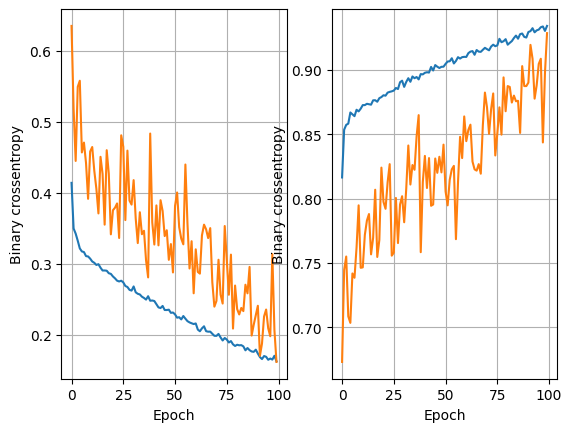

Epoch 1/100
371/371 [==============================] - 3s 5ms/step - loss: 0.4244 - accuracy: 0.8079 - val_loss: 0.4794 - val_accuracy: 0.7530
Epoch 2/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3562 - accuracy: 0.8509 - val_loss: 0.4721 - val_accuracy: 0.7520
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3439 - accuracy: 0.8560 - val_loss: 0.5927 - val_accuracy: 0.7065
Epoch 4/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3359 - accuracy: 0.8568 - val_loss: 0.4072 - val_accuracy: 0.7881
Epoch 5/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3300 - accuracy: 0.8606 - val_loss: 0.5128 - val_accuracy: 0.7264
Epoch 6/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3249 - accuracy: 0.8595 - val_loss: 0.4895 - val_accuracy: 0.7382
Epoch 7/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3209 - accuracy: 0.8629 - val_loss: 0.4371 - val_accuracy: 0.7608

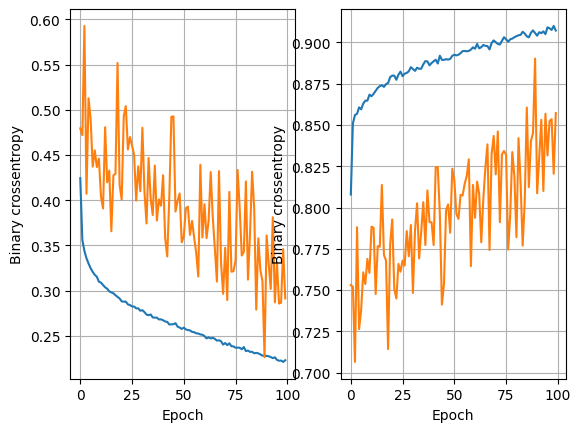

Epoch 1/100
186/186 [==============================] - 2s 6ms/step - loss: 0.4465 - accuracy: 0.7998 - val_loss: 0.6226 - val_accuracy: 0.6449
Epoch 2/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3728 - accuracy: 0.8416 - val_loss: 0.5703 - val_accuracy: 0.7062
Epoch 3/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3516 - accuracy: 0.8550 - val_loss: 0.5546 - val_accuracy: 0.7109
Epoch 4/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3413 - accuracy: 0.8573 - val_loss: 0.5156 - val_accuracy: 0.7318
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3340 - accuracy: 0.8585 - val_loss: 0.5215 - val_accuracy: 0.7416
Epoch 6/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3299 - accuracy: 0.8609 - val_loss: 0.4632 - val_accuracy: 0.7564
Epoch 7/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8630 - val_loss: 0.4696 - val_accuracy: 0.7520

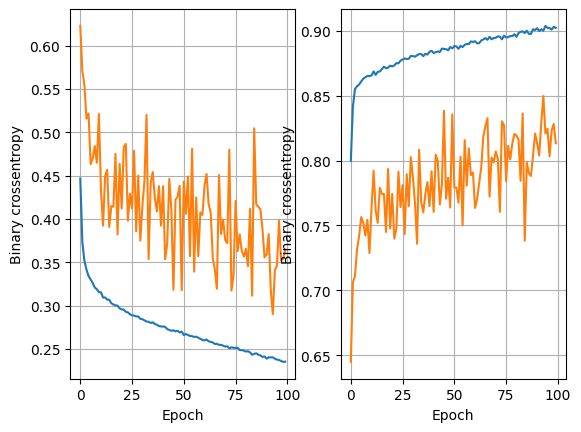

Epoch 1/100
93/93 [==============================] - 2s 7ms/step - loss: 0.4879 - accuracy: 0.7735 - val_loss: 0.6296 - val_accuracy: 0.6435
Epoch 2/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3893 - accuracy: 0.8285 - val_loss: 0.5747 - val_accuracy: 0.6776
Epoch 3/100
93/93 [==============================] - 0s 4ms/step - loss: 0.3661 - accuracy: 0.8470 - val_loss: 0.5360 - val_accuracy: 0.7177
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3524 - accuracy: 0.8530 - val_loss: 0.5107 - val_accuracy: 0.7392
Epoch 5/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3438 - accuracy: 0.8580 - val_loss: 0.5207 - val_accuracy: 0.7332
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3387 - accuracy: 0.8590 - val_loss: 0.4124 - val_accuracy: 0.7898
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3333 - accuracy: 0.8597 - val_loss: 0.4659 - val_accuracy: 0.7608
Epoch 8/100
9

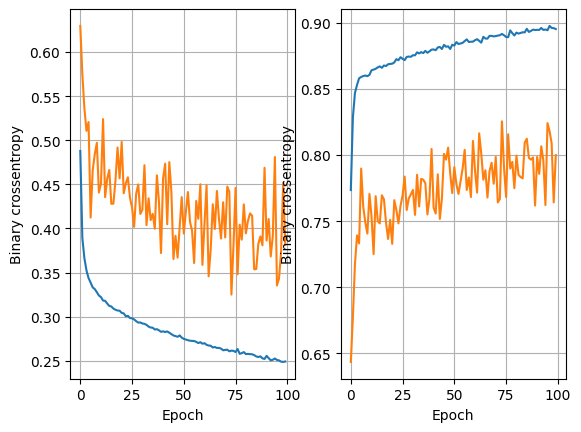

Epoch 1/100
371/371 [==============================] - 3s 6ms/step - loss: 0.4116 - accuracy: 0.8178 - val_loss: 0.6449 - val_accuracy: 0.5954
Epoch 2/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3678 - accuracy: 0.8440 - val_loss: 0.6366 - val_accuracy: 0.6600
Epoch 3/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3598 - accuracy: 0.8489 - val_loss: 0.4223 - val_accuracy: 0.7685
Epoch 4/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3537 - accuracy: 0.8525 - val_loss: 0.5111 - val_accuracy: 0.7217
Epoch 5/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3505 - accuracy: 0.8518 - val_loss: 0.4786 - val_accuracy: 0.7177
Epoch 6/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3446 - accuracy: 0.8542 - val_loss: 0.5781 - val_accuracy: 0.6904
Epoch 7/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3431 - accuracy: 0.8541 - val_loss: 0.4806 - val_accuracy: 0.7193

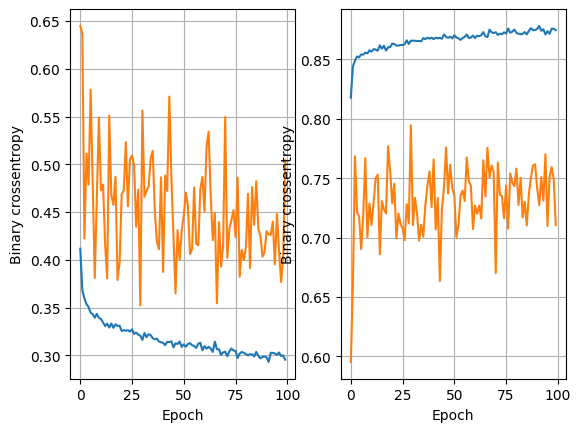

Epoch 1/100
186/186 [==============================] - 4s 7ms/step - loss: 0.4105 - accuracy: 0.8225 - val_loss: 0.5090 - val_accuracy: 0.7163
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3595 - accuracy: 0.8437 - val_loss: 0.5811 - val_accuracy: 0.6971
Epoch 3/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3497 - accuracy: 0.8535 - val_loss: 0.4804 - val_accuracy: 0.7358
Epoch 4/100
186/186 [==============================] - 1s 6ms/step - loss: 0.3461 - accuracy: 0.8556 - val_loss: 0.4688 - val_accuracy: 0.7237
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3440 - accuracy: 0.8531 - val_loss: 0.4471 - val_accuracy: 0.7503
Epoch 6/100
186/186 [==============================] - 1s 6ms/step - loss: 0.3401 - accuracy: 0.8561 - val_loss: 0.4698 - val_accuracy: 0.7294
Epoch 7/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3323 - accuracy: 0.8591 - val_loss: 0.4394 - val_accuracy: 0.7449

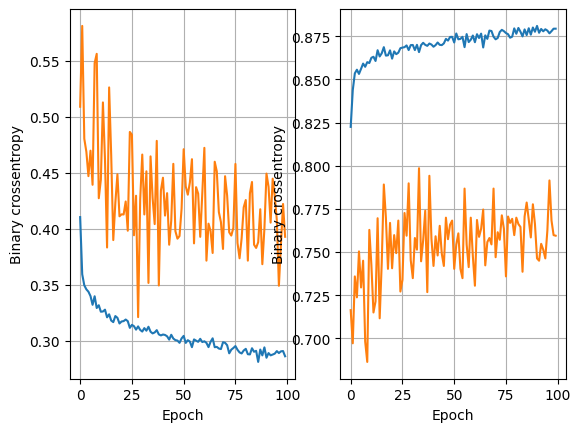

Epoch 1/100
93/93 [==============================] - 2s 9ms/step - loss: 0.4276 - accuracy: 0.8099 - val_loss: 0.6056 - val_accuracy: 0.6813
Epoch 2/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3669 - accuracy: 0.8445 - val_loss: 0.4738 - val_accuracy: 0.7372
Epoch 3/100
93/93 [==============================] - 1s 5ms/step - loss: 0.3559 - accuracy: 0.8497 - val_loss: 0.5628 - val_accuracy: 0.7129
Epoch 4/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3466 - accuracy: 0.8545 - val_loss: 0.5074 - val_accuracy: 0.7311
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3373 - accuracy: 0.8557 - val_loss: 0.4382 - val_accuracy: 0.7473
Epoch 6/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3337 - accuracy: 0.8579 - val_loss: 0.3493 - val_accuracy: 0.8009
Epoch 7/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3334 - accuracy: 0.8568 - val_loss: 0.4502 - val_accuracy: 0.7466
Epoch 8/100
9

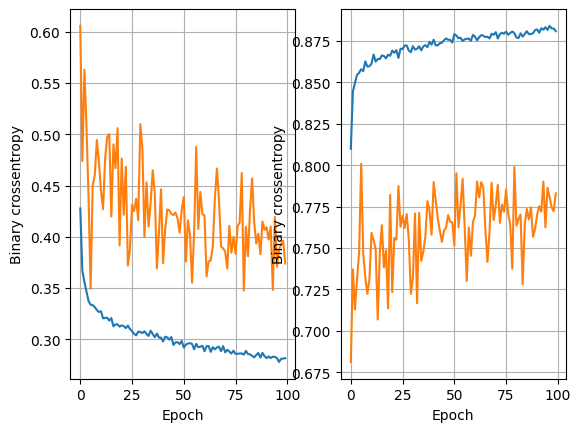

Epoch 1/100
371/371 [==============================] - 3s 6ms/step - loss: 0.4177 - accuracy: 0.8134 - val_loss: 0.5366 - val_accuracy: 0.6985
Epoch 2/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3658 - accuracy: 0.8439 - val_loss: 0.5126 - val_accuracy: 0.6995
Epoch 3/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3537 - accuracy: 0.8508 - val_loss: 0.4595 - val_accuracy: 0.7301
Epoch 4/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3435 - accuracy: 0.8547 - val_loss: 0.5205 - val_accuracy: 0.7089
Epoch 5/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3361 - accuracy: 0.8557 - val_loss: 0.5752 - val_accuracy: 0.6961
Epoch 6/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3344 - accuracy: 0.8576 - val_loss: 0.4933 - val_accuracy: 0.7271
Epoch 7/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3296 - accuracy: 0.8602 - val_loss: 0.5037 - val_accuracy: 0.7079

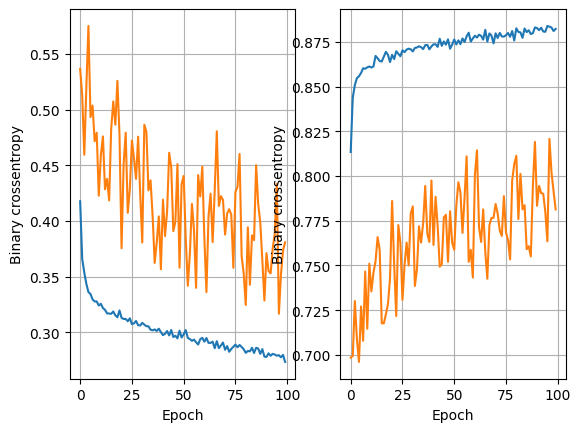

Epoch 1/100
186/186 [==============================] - 3s 9ms/step - loss: 0.4145 - accuracy: 0.8156 - val_loss: 0.5916 - val_accuracy: 0.6907
Epoch 2/100
186/186 [==============================] - 1s 6ms/step - loss: 0.3712 - accuracy: 0.8440 - val_loss: 0.5826 - val_accuracy: 0.7032
Epoch 3/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3561 - accuracy: 0.8518 - val_loss: 0.4249 - val_accuracy: 0.7850
Epoch 4/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3481 - accuracy: 0.8528 - val_loss: 0.5020 - val_accuracy: 0.7197
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3390 - accuracy: 0.8552 - val_loss: 0.4102 - val_accuracy: 0.7527
Epoch 6/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3322 - accuracy: 0.8584 - val_loss: 0.4769 - val_accuracy: 0.7429
Epoch 7/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3279 - accuracy: 0.8623 - val_loss: 0.4102 - val_accuracy: 0.7517

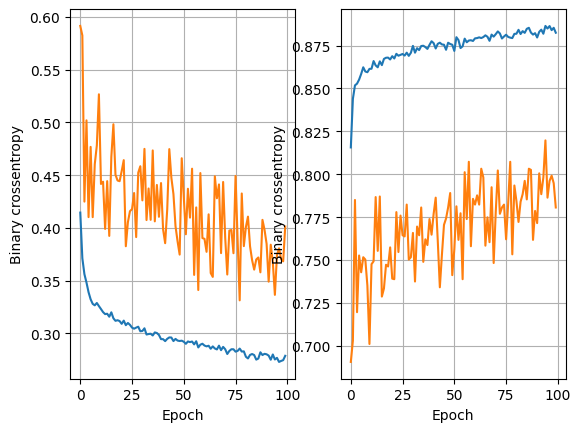

Epoch 1/100
93/93 [==============================] - 3s 11ms/step - loss: 0.4392 - accuracy: 0.7971 - val_loss: 0.5893 - val_accuracy: 0.7065
Epoch 2/100
93/93 [==============================] - 1s 7ms/step - loss: 0.3758 - accuracy: 0.8414 - val_loss: 0.4663 - val_accuracy: 0.7618
Epoch 3/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3579 - accuracy: 0.8472 - val_loss: 0.4183 - val_accuracy: 0.7645
Epoch 4/100
93/93 [==============================] - 1s 5ms/step - loss: 0.3513 - accuracy: 0.8482 - val_loss: 0.4854 - val_accuracy: 0.7241
Epoch 5/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3405 - accuracy: 0.8568 - val_loss: 0.5258 - val_accuracy: 0.7163
Epoch 6/100
93/93 [==============================] - 1s 5ms/step - loss: 0.3338 - accuracy: 0.8610 - val_loss: 0.4732 - val_accuracy: 0.7429
Epoch 7/100
93/93 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.8590 - val_loss: 0.3929 - val_accuracy: 0.7668
Epoch 8/100


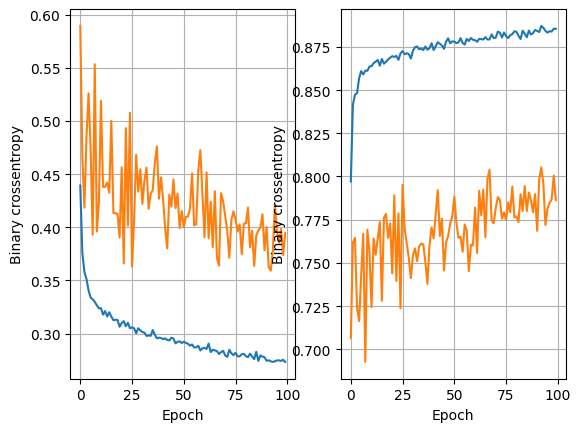

Epoch 1/100
371/371 [==============================] - 3s 5ms/step - loss: 0.4605 - accuracy: 0.7873 - val_loss: 0.5743 - val_accuracy: 0.6887
Epoch 2/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3970 - accuracy: 0.8279 - val_loss: 0.5572 - val_accuracy: 0.7072
Epoch 3/100
371/371 [==============================] - 1s 4ms/step - loss: 0.3760 - accuracy: 0.8386 - val_loss: 0.4914 - val_accuracy: 0.7483
Epoch 4/100
371/371 [==============================] - 2s 4ms/step - loss: 0.3624 - accuracy: 0.8451 - val_loss: 0.5209 - val_accuracy: 0.7338
Epoch 5/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3539 - accuracy: 0.8503 - val_loss: 0.5004 - val_accuracy: 0.7419
Epoch 6/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3480 - accuracy: 0.8515 - val_loss: 0.5373 - val_accuracy: 0.7139
Epoch 7/100
371/371 [==============================] - 2s 5ms/step - loss: 0.3438 - accuracy: 0.8556 - val_loss: 0.4613 - val_accuracy: 0.7577

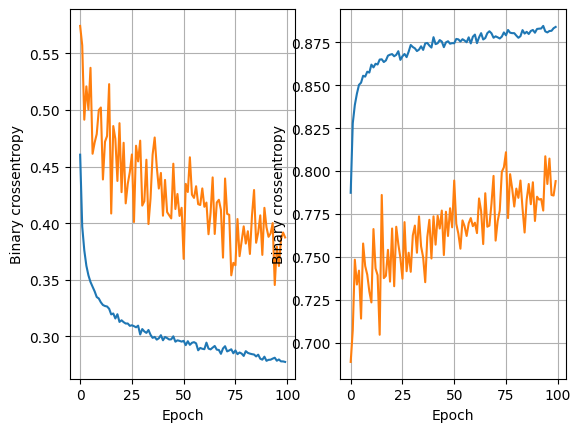

Epoch 1/100
186/186 [==============================] - 3s 8ms/step - loss: 0.4737 - accuracy: 0.7868 - val_loss: 0.5650 - val_accuracy: 0.6782
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 0.4091 - accuracy: 0.8197 - val_loss: 0.5935 - val_accuracy: 0.6897
Epoch 3/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3872 - accuracy: 0.8358 - val_loss: 0.4886 - val_accuracy: 0.7436
Epoch 4/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3751 - accuracy: 0.8410 - val_loss: 0.4891 - val_accuracy: 0.7389
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3631 - accuracy: 0.8489 - val_loss: 0.5252 - val_accuracy: 0.7187
Epoch 6/100
186/186 [==============================] - 1s 5ms/step - loss: 0.3607 - accuracy: 0.8466 - val_loss: 0.5370 - val_accuracy: 0.7190
Epoch 7/100
186/186 [==============================] - 1s 6ms/step - loss: 0.3546 - accuracy: 0.8522 - val_loss: 0.4440 - val_accuracy: 0.7480

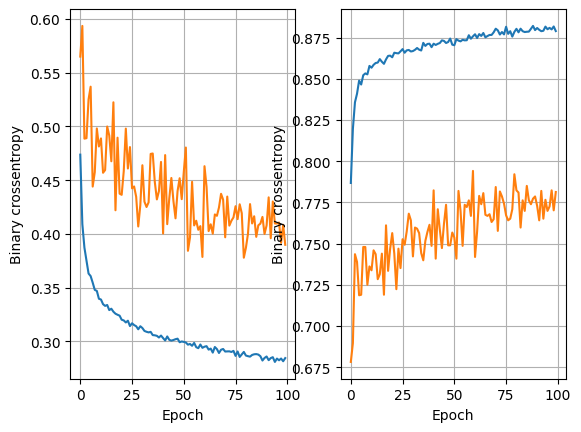

Epoch 1/100
93/93 [==============================] - 2s 8ms/step - loss: 0.5104 - accuracy: 0.7560 - val_loss: 0.6210 - val_accuracy: 0.6395
Epoch 2/100
93/93 [==============================] - 1s 7ms/step - loss: 0.4208 - accuracy: 0.8097 - val_loss: 0.5901 - val_accuracy: 0.6641
Epoch 3/100
93/93 [==============================] - 1s 7ms/step - loss: 0.4051 - accuracy: 0.8163 - val_loss: 0.5901 - val_accuracy: 0.6776
Epoch 4/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3898 - accuracy: 0.8329 - val_loss: 0.5300 - val_accuracy: 0.7133
Epoch 5/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3802 - accuracy: 0.8359 - val_loss: 0.5160 - val_accuracy: 0.7274
Epoch 6/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3720 - accuracy: 0.8397 - val_loss: 0.5333 - val_accuracy: 0.7163
Epoch 7/100
93/93 [==============================] - 1s 6ms/step - loss: 0.3661 - accuracy: 0.8439 - val_loss: 0.5019 - val_accuracy: 0.7352
Epoch 8/100
9

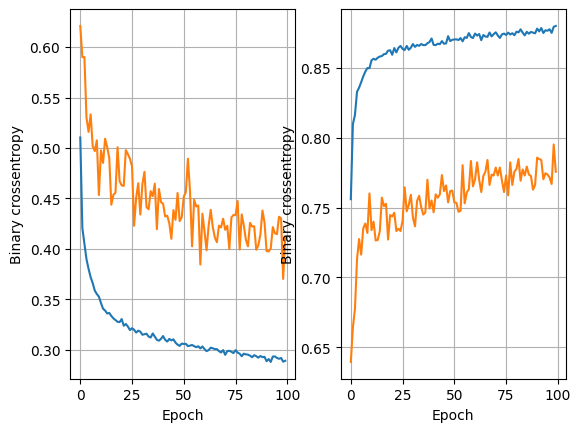

In [ ]:
least_val_loss=float['inf']
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss=model.evaluate(x_valid,y_valid)[0]
        if val_loss<least_vall_loss:
          least_val_loss=val_loss
          least_loss_model=model



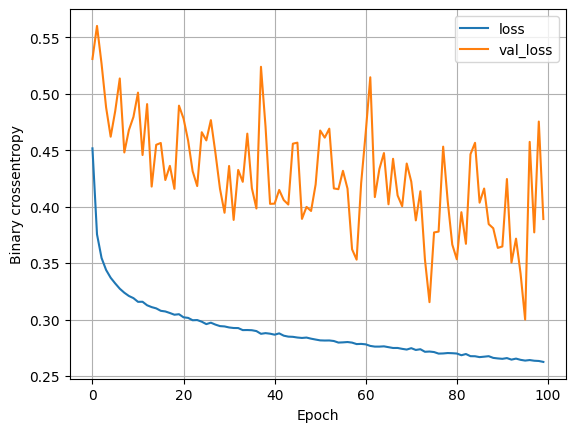

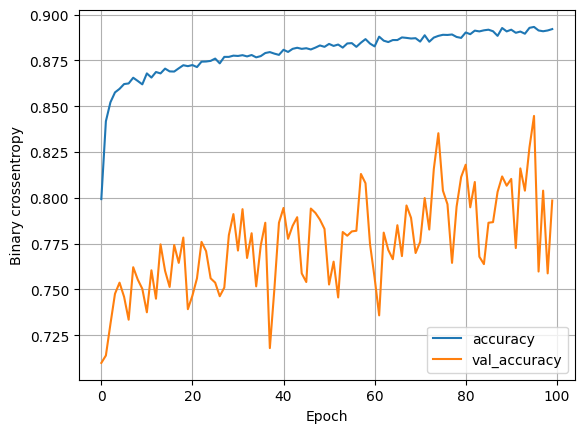

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [ ]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
y_pred

In [ ]:
print(clasification_report(y_test,y_pred))